- 나이브 베이즈는 명목형 독립변수를 더미화할 필요는 없음, 라벨링만 하면 됨
    - 확률값을 기반으로 추정을 함

In [1]:
import os
os.chdir("Y:\Python\Mega_IT\E.Inferential_statistics/7.Supervised_Learning/3.Naive_Bayes")
os.getcwd()

'Y:\\Python\\Mega_IT\\E.Inferential_statistics\\7.Supervised_Learning\\3.Naive_Bayes'

In [2]:
import sys
sys.path.append("Y:\Python\Mega_IT")

import warnings
warnings.filterwarnings('ignore')

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
origin1 = pd.read_excel("./data/pima_indians_diabetes.xlsx")

In [6]:
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

df1 = origin1.copy()
df1[zero_features] = df1[zero_features].replace(0, np.nan)
df1_2 = my_replace_missing_value(df1)

df1_2['Outcome'] = df1_2['Outcome'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(df1_2, yname='Outcome', test_size=0.2, scalling=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [7]:
estimator = GaussianNB(var_smoothing=1e-09)

estimator.fit(x_train, y_train)
print("훈련데이터 점수: ", estimator.score(x_train, y_train))
print("검증데이터 점수: ", estimator.score(x_test, y_test))

훈련데이터 점수:  0.749185667752443
검증데이터 점수:  0.7727272727272727


[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.749186 |     0.772727 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.645833 |     0.716981 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.590476 |     0.655172 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |     0.168317 |      0.15625 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.831683 |      0.84375 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.616915 |     0.684685 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.817056 |     0.873743 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+--

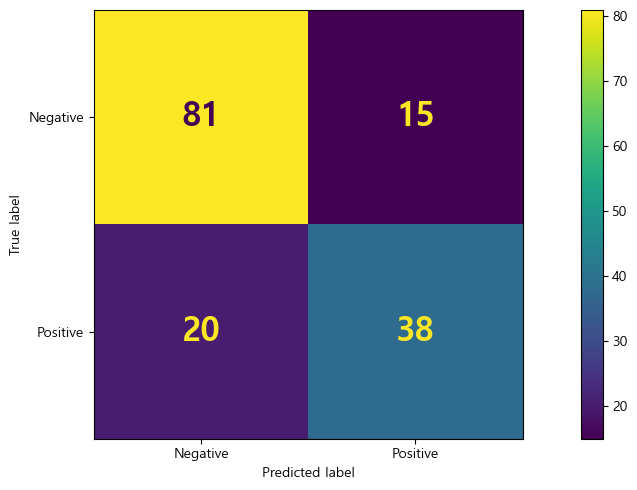


[Roc Curve]


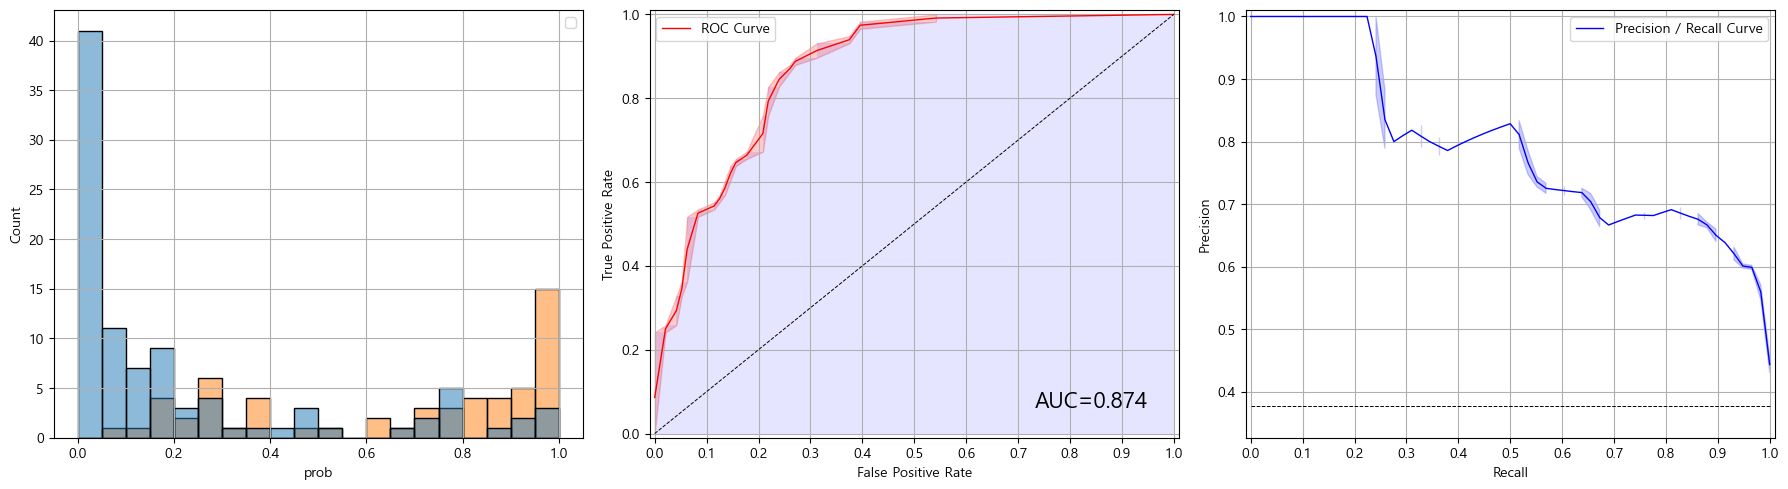


[학습곡선]


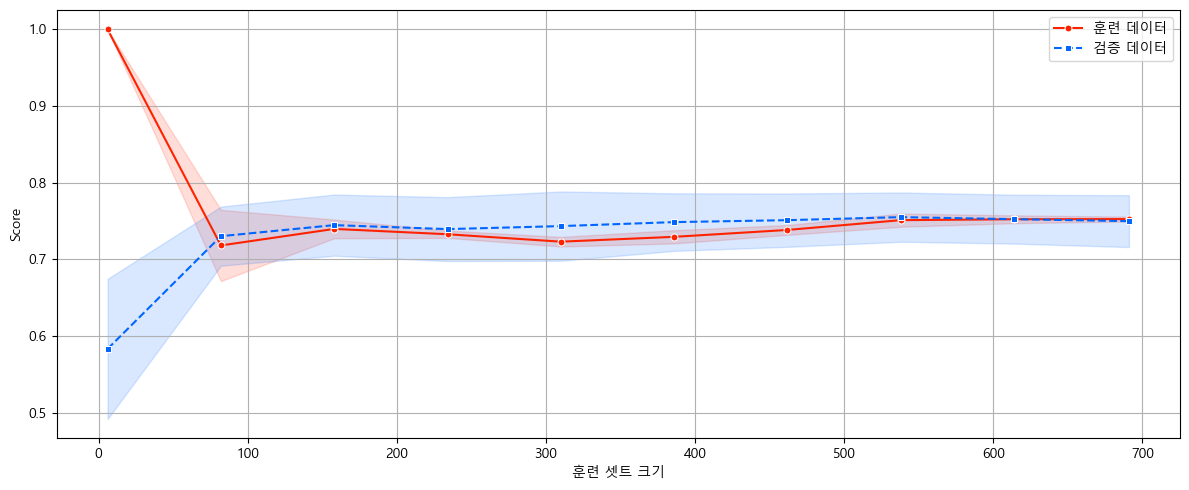

In [8]:
my_classification_result(estimator, x_train, y_train, x_test, y_test)

<class 'sklearn.naive_bayes.GaussianNB'>는 n_jobs를 허용하지 않음
[교차검증 TOP5]
+----+-----------------+-------------------+
|    |   var_smoothing |   mean_test_score |
|----+-----------------+-------------------|
|  4 |           1e-05 |           0.75899 |
|  2 |           1e-07 |          0.750833 |
|  3 |           1e-06 |          0.749207 |
|  0 |           1e-09 |          0.749207 |
|  1 |           1e-08 |          0.749207 |
+----+-----------------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.758958 |     0.772727 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.663158 |     0.716981 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재

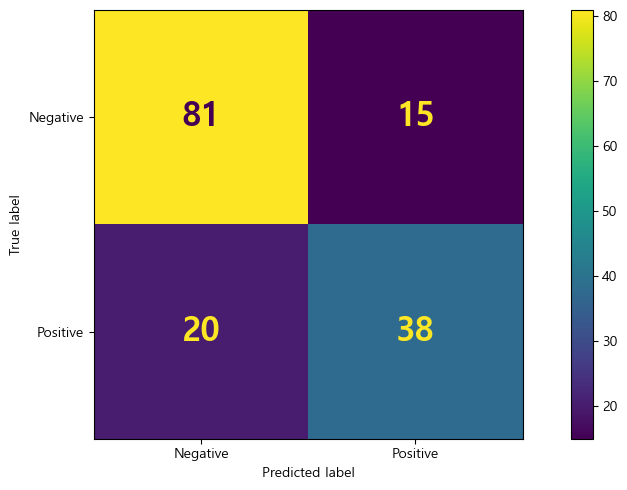


[Roc Curve]


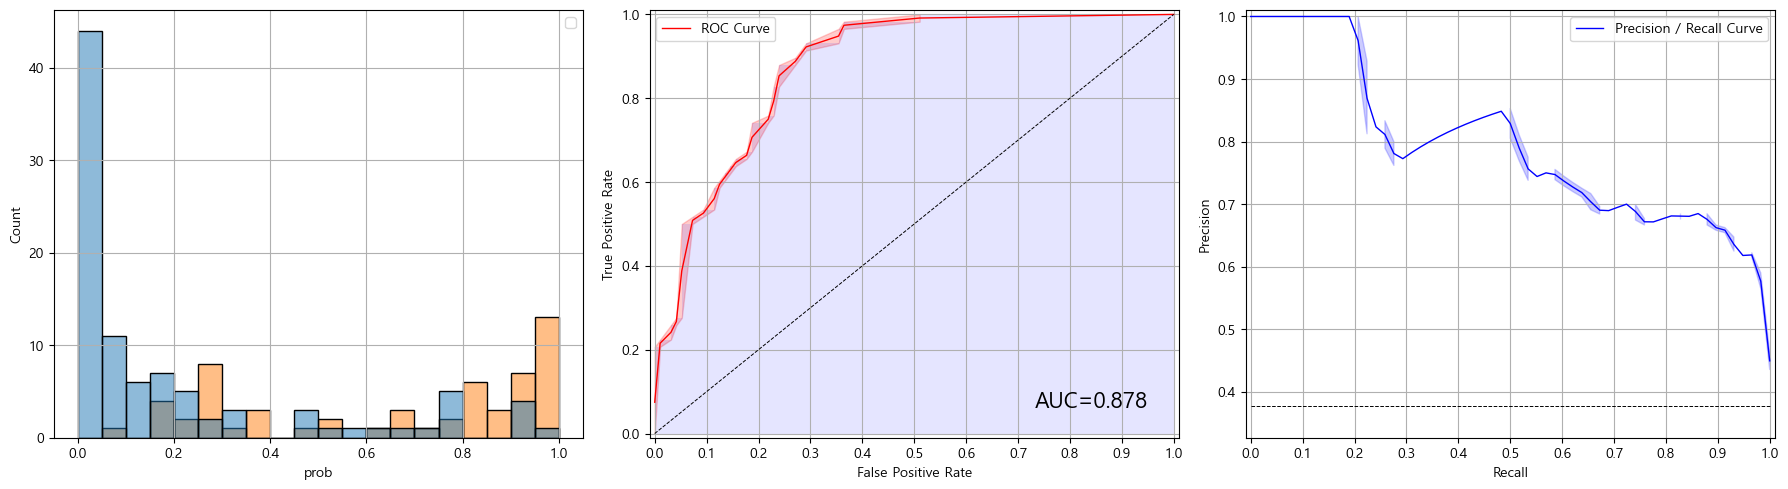


[학습곡선]


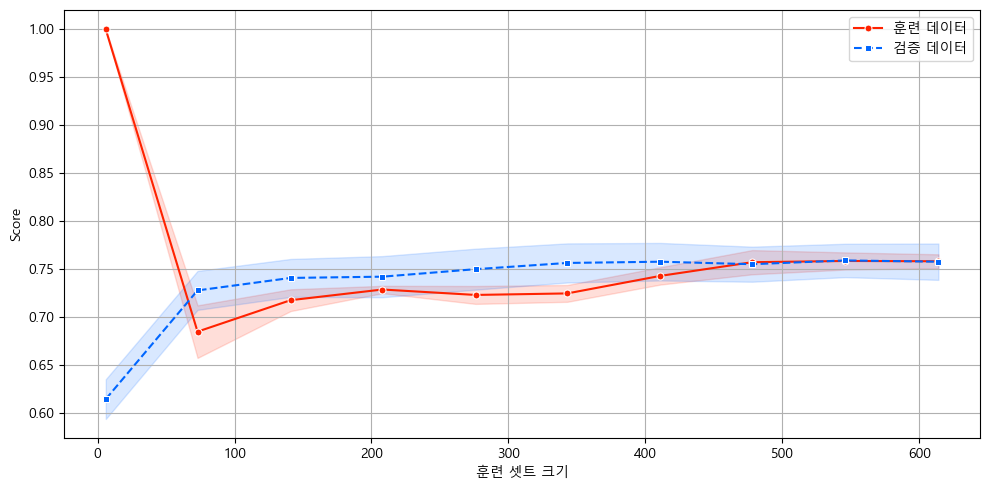

CPU times: total: 328 ms
Wall time: 1.29 s


GaussianNB(var_smoothing=1e-05)

In [9]:
%%time
my_nb_classification(x_train, y_train, x_test, y_test)

In [10]:
%%time
my_classification(x_train, y_train, x_test, y_test)

<class 'sklearnex.svm.svc.SVC'>는 n_jobs를 허용하지 않음<class 'sklearn.naive_bayes.GaussianNB'>는 n_jobs를 허용하지 않음

+----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|                      |   의사결정계수(Pseudo R2) |   정확도(Accuracy) |   정밀도(Precision) |   재현율(Recall) |   위양성율(Fallout) |   특이성(TNR) |   F1 Score |      AUC |
|----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------|
| GaussianNB           |                         0 |           0.772727 |            0.716981 |         0.655172 |             0.15625 |       0.84375 |   0.684685 | 0.873743 |
| SVC                  |                         0 |           0.772727 |            0.794872 |         0.534483 |           0.0833333 |      0.916667 |   0.639175 |      nan |
| LogisticRegression   |      

{'GaussianNB': GaussianNB(),
 'SVC': SVC(C=10, degree=2, kernel='poly'),
 'LogisticRegression': LogisticRegression(C=0.001, max_iter=1000, n_jobs=1),
 'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan', n_jobs=-1, p=1, weights='distance')}

In [11]:
support = YjkClassifierSupport()

사용 가능한 모델 : ['LogisticRegression', 'SGDClassifier', 'KNeighborsClassifier', 'LinearSVC', 'SVC', 'GaussianNB', 'CatboostClassifier']


In [12]:
result_df1 = yjk_classifier_multi_gridsearch(support, x_train, y_train, x_test, y_test, randomized_search = True)

LogisticRegression 모델 소요 시간 : 0:00:01
SGDClassifier 모델 소요 시간 : 0:00:00
KNeighborsClassifier 모델 소요 시간 : 0:00:00
LinearSVC 모델 소요 시간 : 0:00:01
SVC 모델 소요 시간 : 0:01:10
GaussianNB 모델 소요 시간 : 0:00:00
총 소요 시간 : 0:01:15


In [13]:
result_df1

,best_model,best_param,accuracy_train,accuracy_test
model_name,,,,
LinearSVC,"LinearSVC(C=10, dual=False, random_state=0)","{'penalty': 'l2', 'max_iter': 1000, 'loss': 's...",0.768747,0.785714
LogisticRegression,"LogisticRegression(C=10, max_iter=500, n_jobs=-1)","{'penalty': 'l2', 'max_iter': 500, 'C': 10}",0.770360,0.779221
SVC,"SVC(C=10, degree=2, kernel='poly')","{'kernel': 'poly', 'degree': 2, 'C': 10}",0.767054,0.772727
GaussianNB,GaussianNB(var_smoothing=1e-05),{'var_smoothing': 1e-05},0.758884,0.772727
KNeighborsClassifier,"KNeighborsClassifier(n_jobs=-1, n_neighbors=4,...","{'weights': 'distance', 'p': 1, 'n_neighbors': 4}",0.737864,0.766234
SGDClassifier,"SGDClassifier(alpha=1, loss='log_loss', n_jobs...","{'tol': 0.001, 'penalty': 'l1', 'max_iter': 10...",0.682549,0.746753


In [14]:
origin2 = pd.read_excel("./data/wine.xlsx")

In [15]:
df2 = origin2.copy()
df2['class'] = df2['class'].astype('int')

In [16]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='class', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

<class 'sklearn.naive_bayes.GaussianNB'>는 n_jobs를 허용하지 않음
[교차검증 TOP5]
+----+-----------------+-------------------+
|    |   var_smoothing |   mean_test_score |
|----+-----------------+-------------------|
|  0 |           1e-09 |          0.971429 |
|  1 |           1e-08 |          0.971429 |
|  2 |           1e-07 |          0.971429 |
|  3 |           1e-06 |          0.971429 |
|  4 |           1e-05 |          0.971429 |
+----+-----------------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.978873 |            1 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.978654 |            1 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재

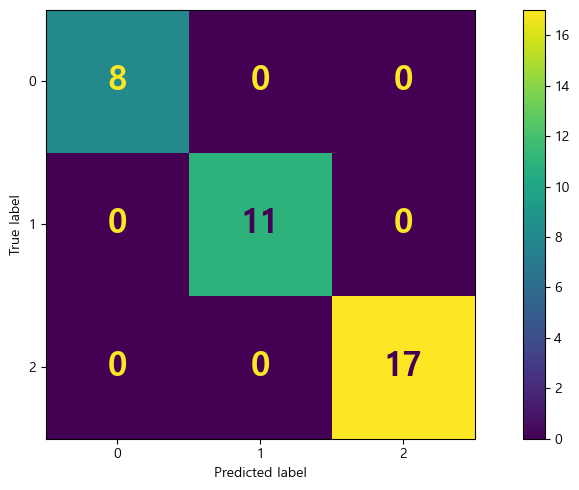


[Roc Curve]


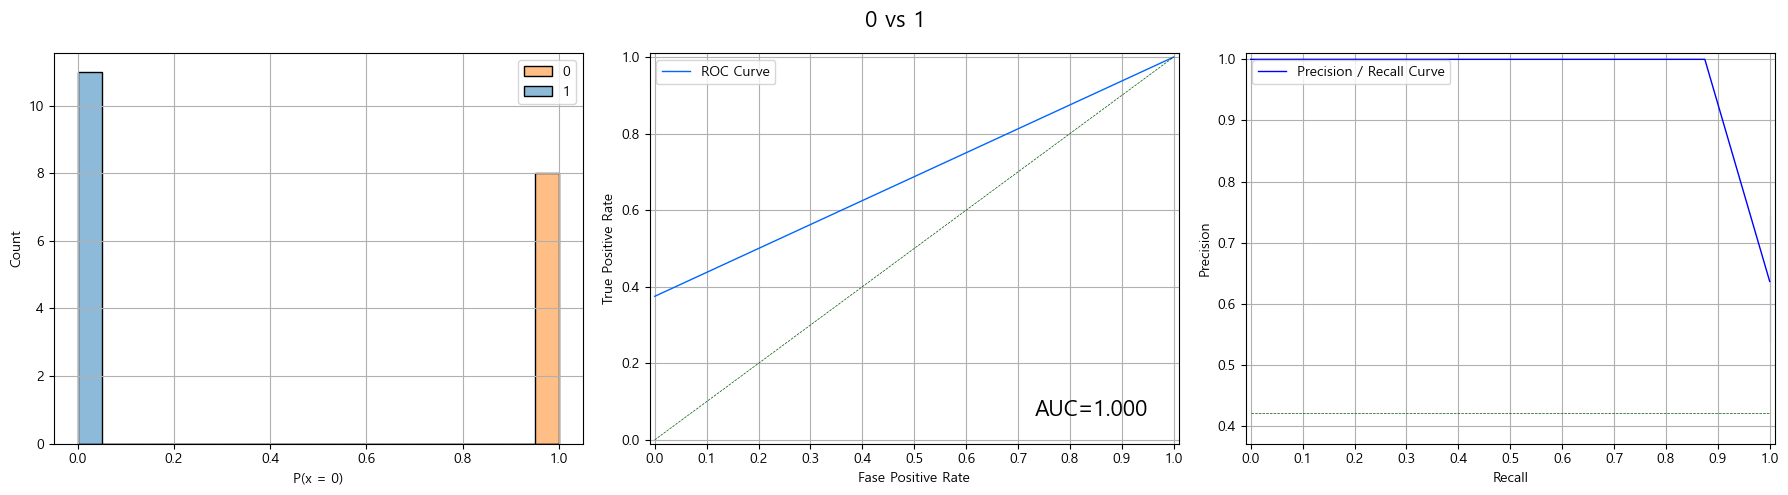

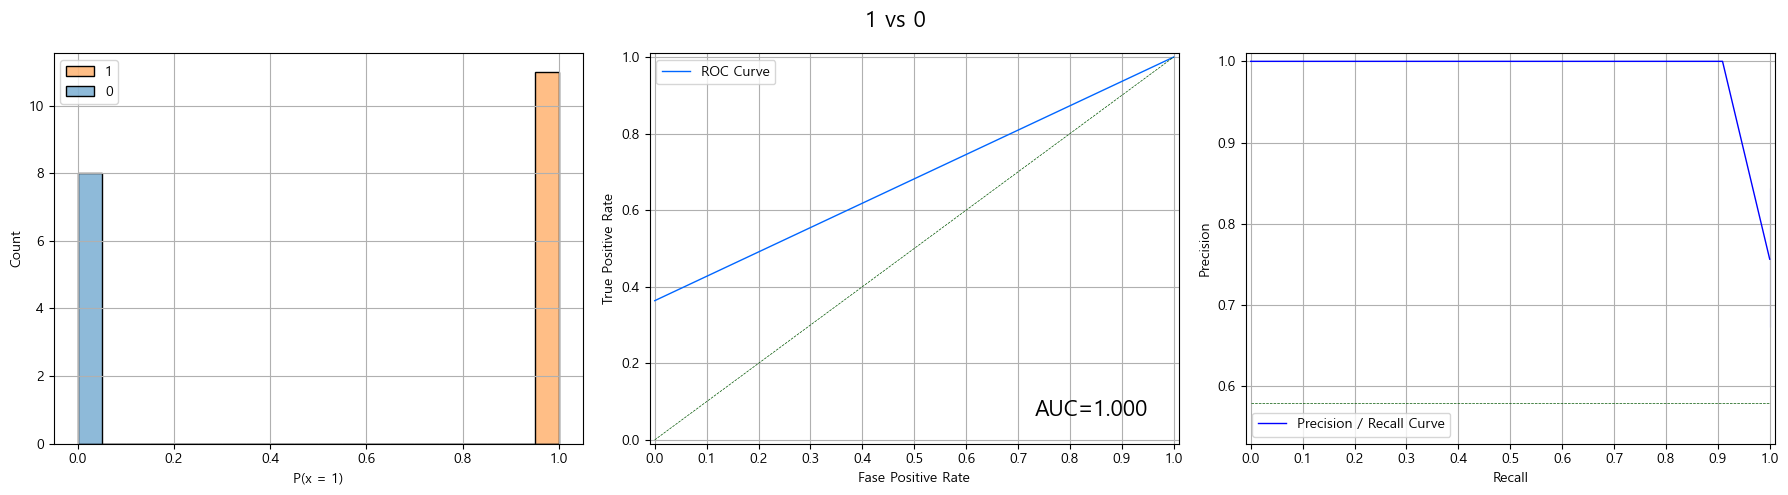

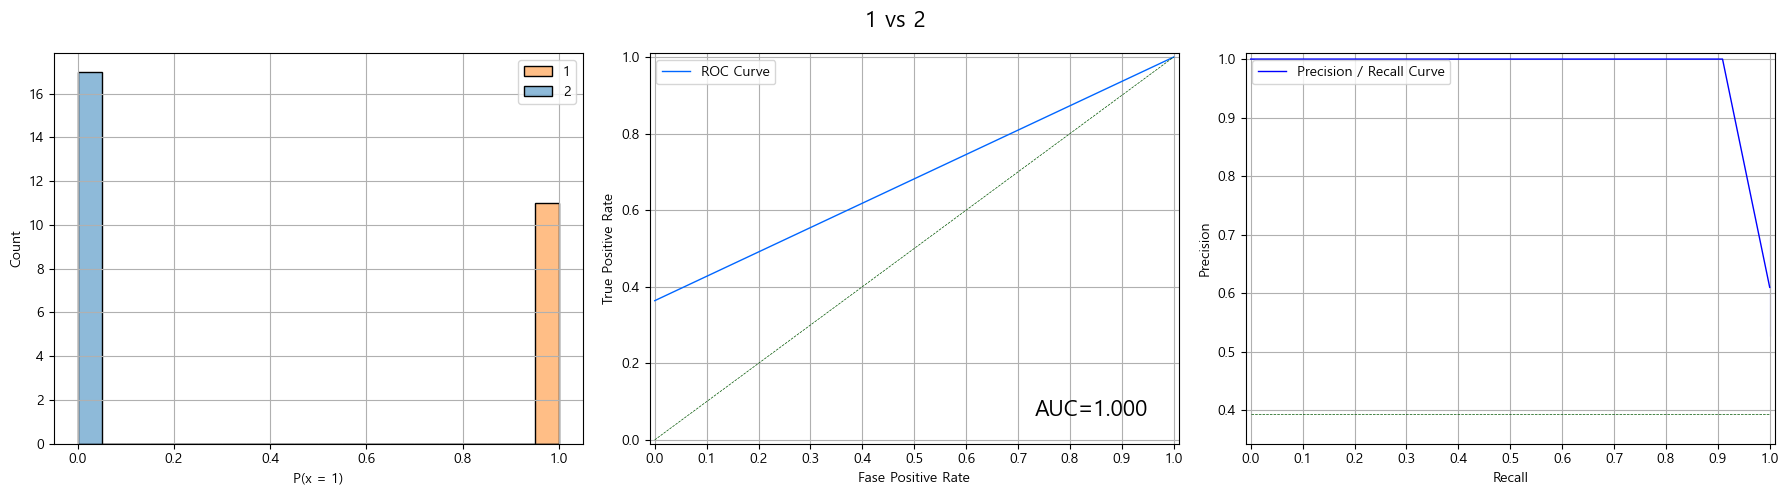

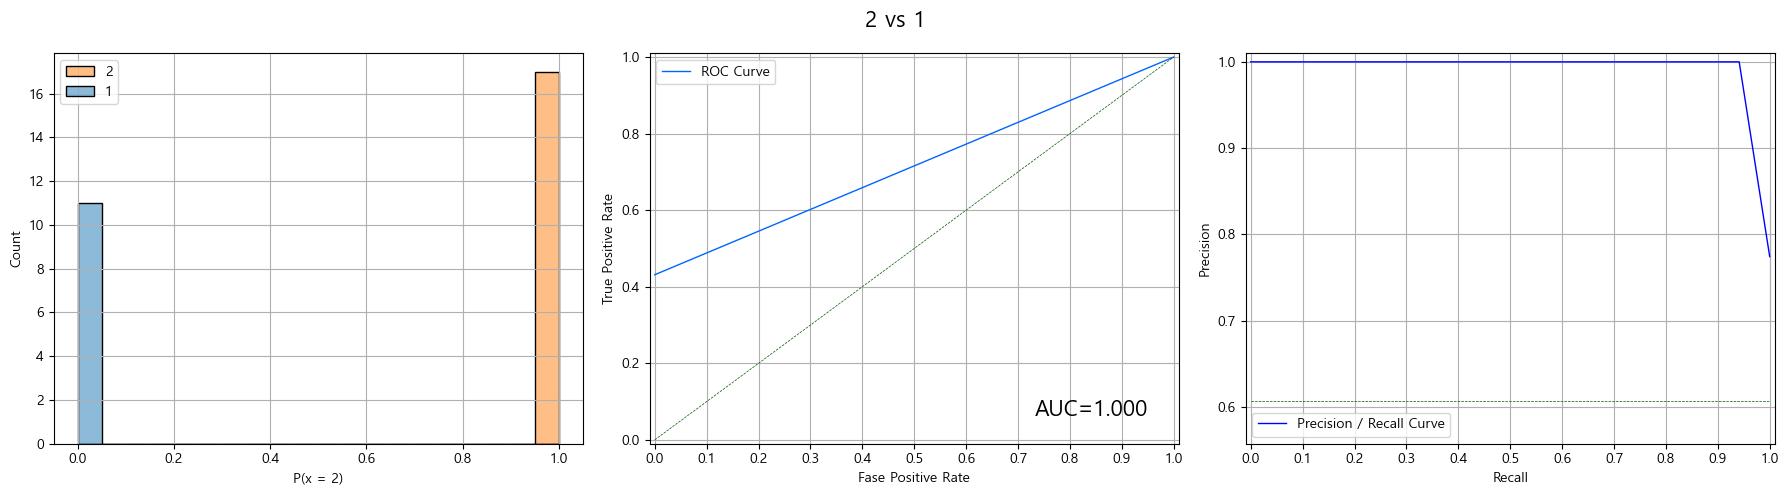

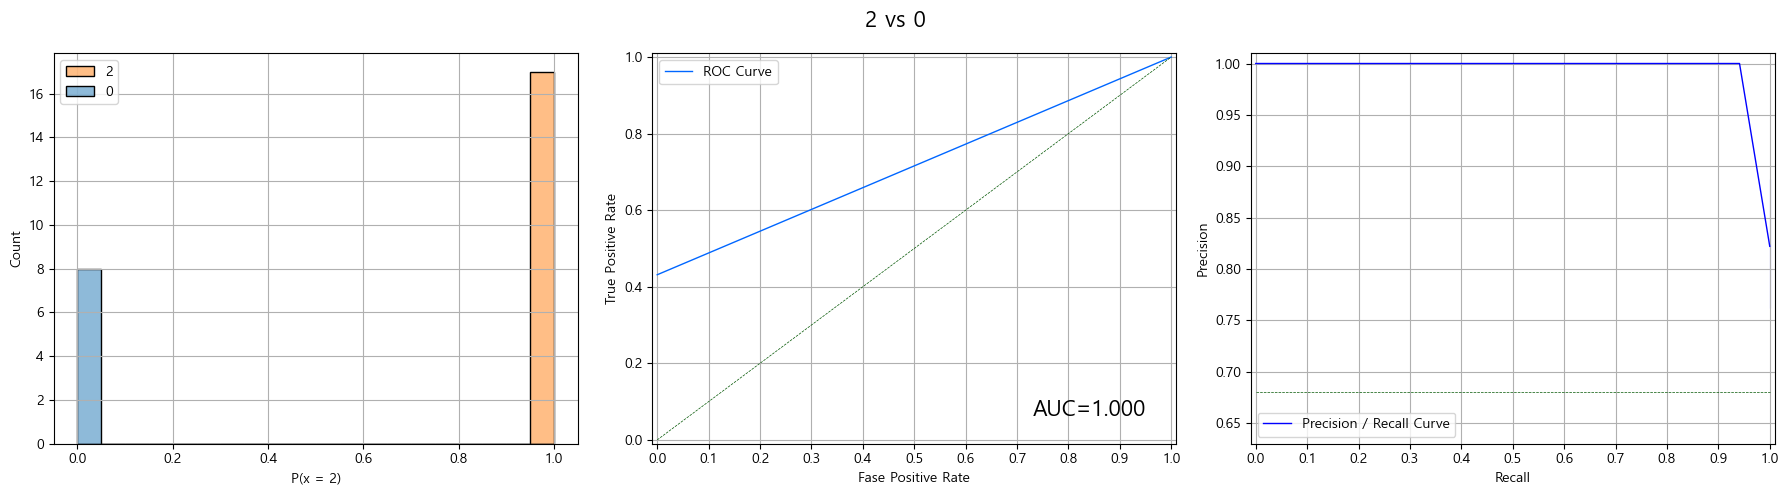

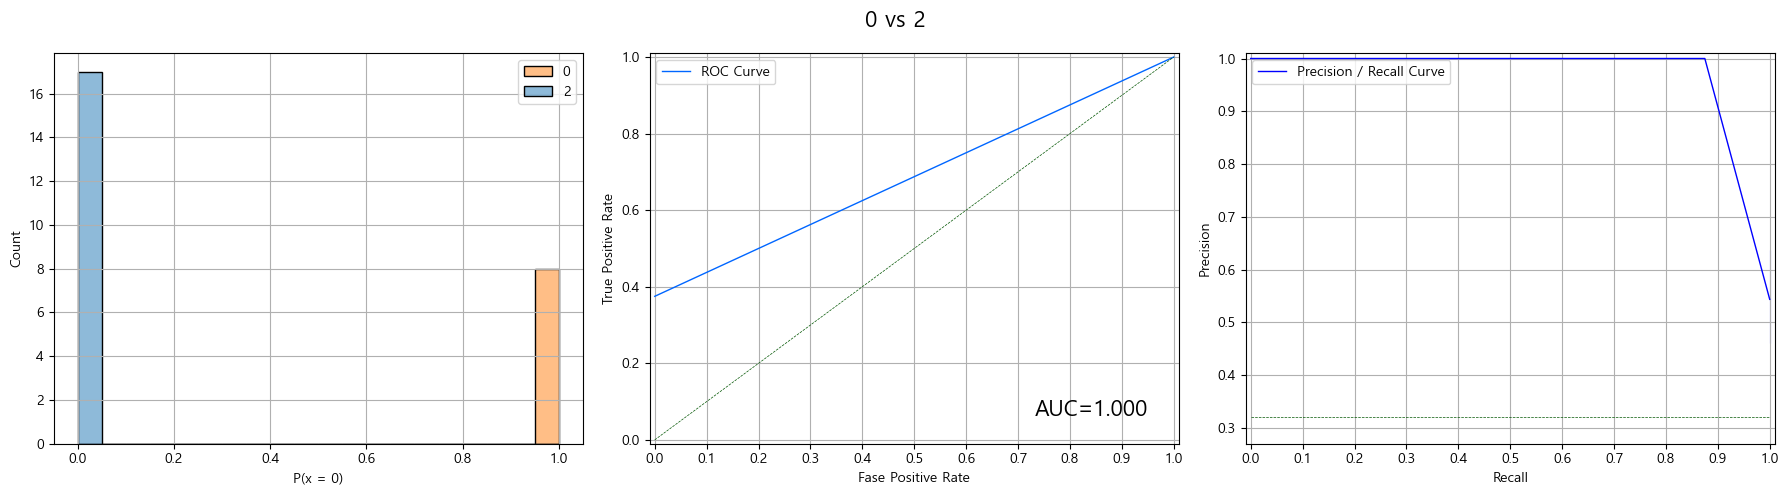

mean roc auc ovo: 1.0000


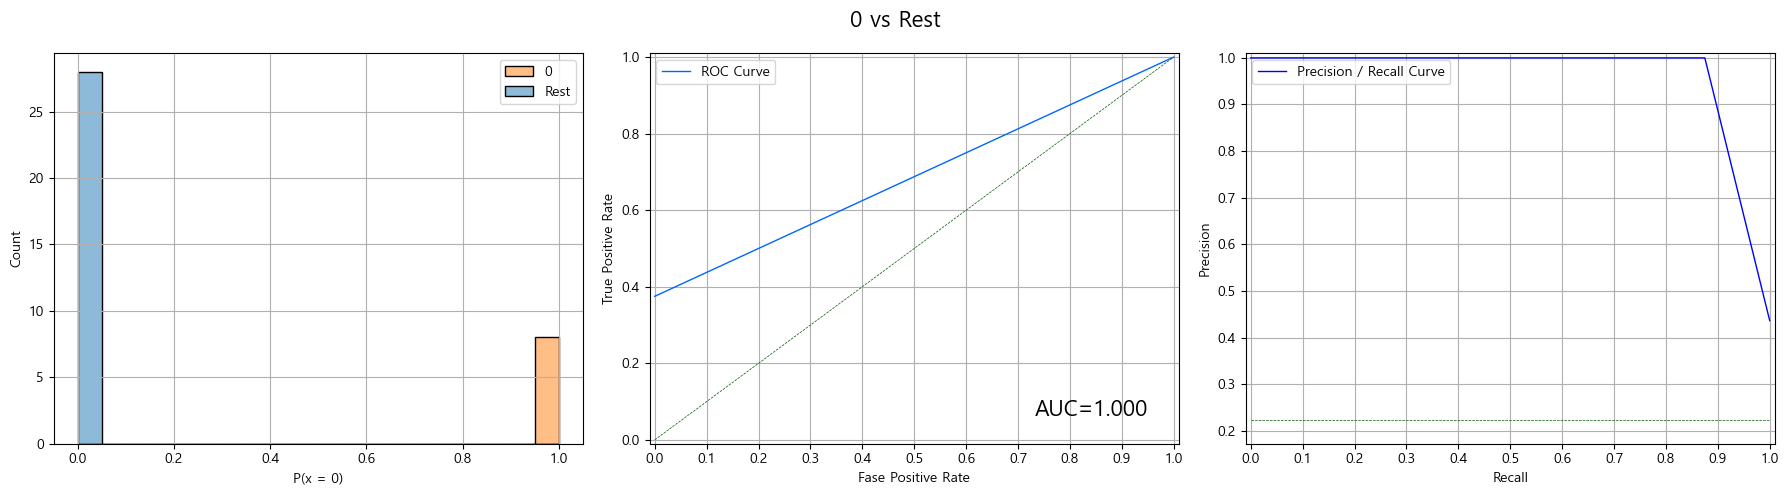

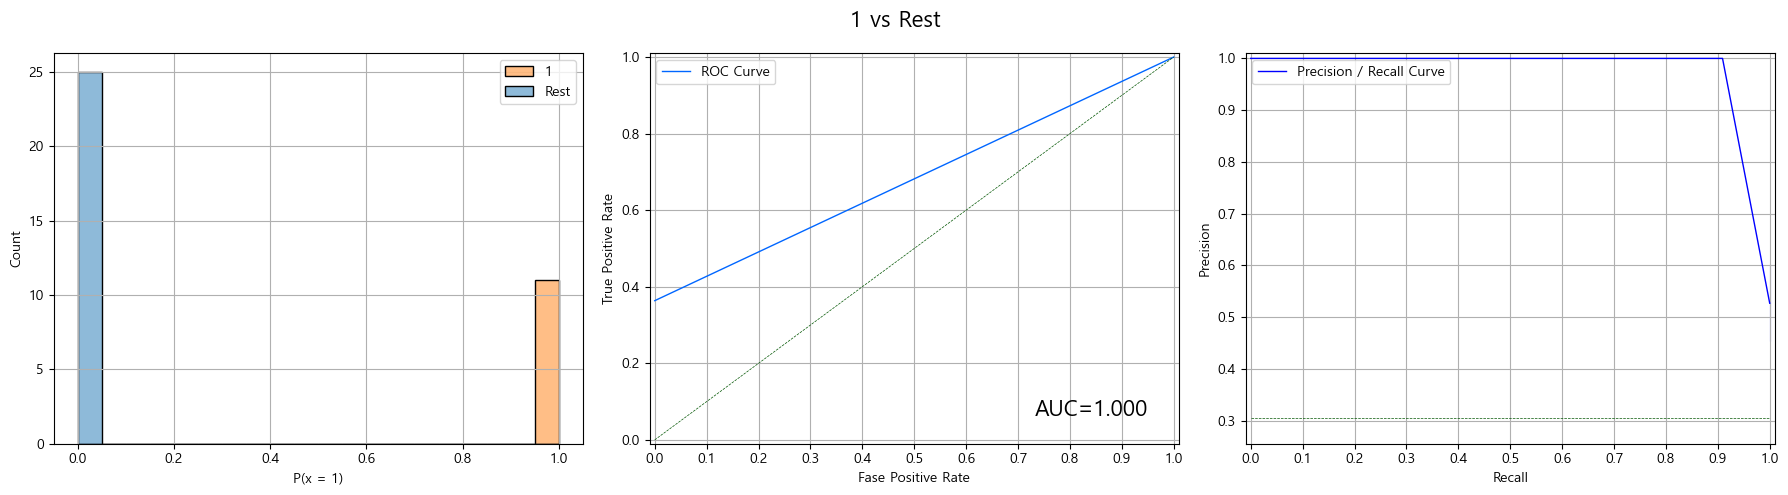

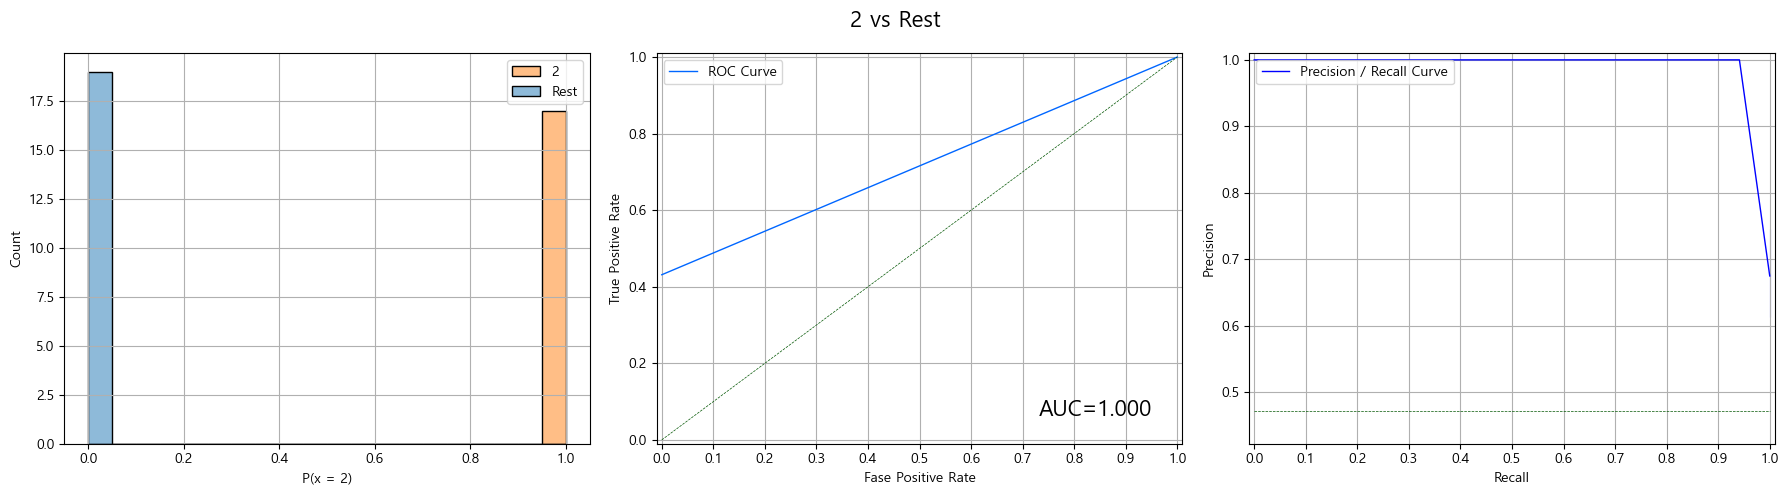

mean roc auc ovo: 1.0000

[학습곡선]


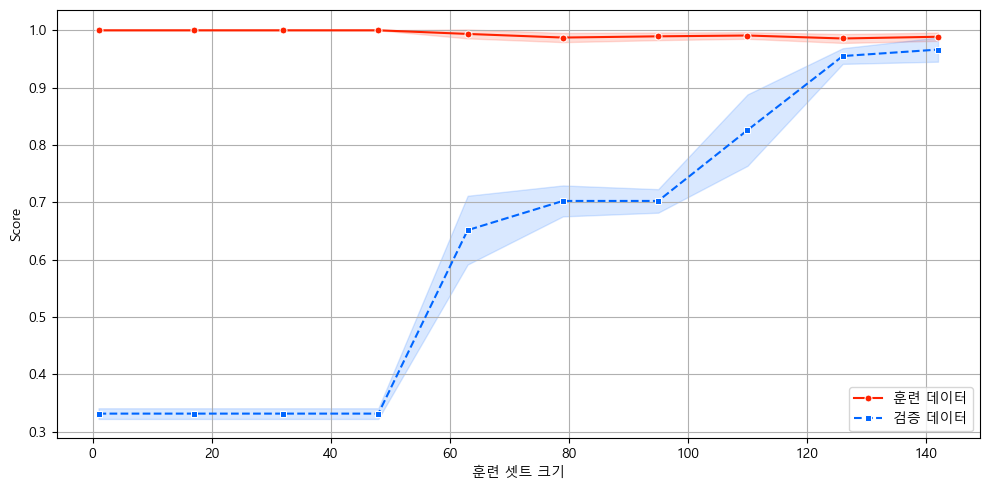

CPU times: total: 1.7 s
Wall time: 3.81 s


GaussianNB()

In [17]:
%%time
my_nb_classification(x_train, y_train, x_test, y_test)

In [18]:
%%time
my_classification(x_train, y_train, x_test, y_test)

<class 'sklearnex.svm.svc.SVC'>는 n_jobs를 허용하지 않음<class 'sklearn.naive_bayes.GaussianNB'>는 n_jobs를 허용하지 않음

+----------------------+--------------------+---------------------+------------------+------------+------------+------------+
|                      |   정확도(Accuracy) |   정밀도(Precision) |   재현율(Recall) |   F1 Score |   AUC(ovo) |   AUC(ovr) |
|----------------------+--------------------+---------------------+------------------+------------+------------+------------|
| GaussianNB           |                  1 |                   1 |                1 |          1 |          1 |          1 |
| SVC                  |           0.972222 |            0.962963 |         0.969697 |   0.964519 |        nan |        nan |
| LogisticRegression   |           0.972222 |            0.972222 |         0.980392 |   0.975406 |   0.999109 |   0.998788 |
| KNeighborsClassifier |                  1 |                   1 |                1 |          1 |          1 |          1 |
+-------------------

{'GaussianNB': GaussianNB(),
 'SVC': SVC(C=0.1, degree=2, kernel='sigmoid'),
 'LogisticRegression': LogisticRegression(C=1, max_iter=1000, n_jobs=1),
 'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=7, p=1)}

In [19]:
result_df2 = yjk_classifier_multi_gridsearch(support, x_train, y_train, x_test, y_test, randomized_search = True)

LogisticRegression 모델 소요 시간 : 0:00:00
SGDClassifier 모델 소요 시간 : 0:00:00
KNeighborsClassifier 모델 소요 시간 : 0:00:00
LinearSVC 모델 소요 시간 : 0:00:00
SVC 모델 소요 시간 : 0:00:00
GaussianNB 모델 소요 시간 : 0:00:00
총 소요 시간 : 0:00:03


In [20]:
result_df2

,best_model,best_param,accuracy_train,accuracy_test
model_name,,,,
KNeighborsClassifier,"KNeighborsClassifier(n_jobs=-1, n_neighbors=7,...","{'weights': 'uniform', 'p': 1, 'n_neighbors': 7}",0.979048,1.000000
LinearSVC,"LinearSVC(C=0.1, loss='hinge', max_iter=10000,...","{'penalty': 'l2', 'max_iter': 10000, 'loss': '...",0.985714,1.000000
GaussianNB,GaussianNB(),{'var_smoothing': 1e-09},0.964286,1.000000
LogisticRegression,"LogisticRegression(C=0.1, n_jobs=-1)","{'penalty': 'l2', 'max_iter': 100, 'C': 0.1}",0.985714,0.972222
SGDClassifier,"SGDClassifier(alpha=0.1, n_jobs=-1, random_sta...","{'tol': 0.01, 'penalty': 'l2', 'max_iter': 100...",0.992857,0.972222
SVC,"SVC(C=0.1, degree=2, kernel='sigmoid')","{'kernel': 'sigmoid', 'degree': 2, 'C': 0.1}",0.985714,0.972222
